In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

In [11]:
df = pd.read_csv('telecom.csv')  # replace with your dataset name
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Clean blank or invalid values
df['Churn'] = df['Churn'].replace([' ', 'nan', 'NaN', 'NULL', ''], pd.NA)

# Drop rows where Churn is missing
df = df.dropna(subset=['Churn'])

# Encode 'Yes'/'No' to 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [11]:
# Replace blank strings with NaN in all object columns
df = df.replace(' ', np.nan)

# Convert TotalCharges to numeric (some entries may be blank)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [13]:
# Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Optional: reset index
df.reset_index(drop=True, inplace=True)

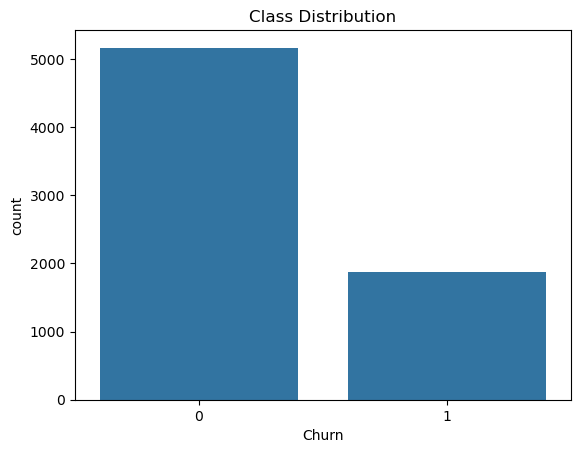

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

In [15]:
sns.countplot(x='Churn', data=df)
plt.title("Class Distribution")
plt.show()

# Check actual numbers
df['Churn'].value_counts(normalize=True)

In [36]:
# Label encode binary columns
le = LabelEncoder()
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])
df = pd.get_dummies(df, drop_first=True)

In [38]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)


In [40]:
imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X.columns)

In [42]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [44]:
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_sm, y_train_sm)

y_pred_log = logreg.predict(X_test)
y_prob_log = logreg.predict_proba(X_test)[:, 1]

In [50]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_sm, y_train_sm)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [51]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_sm, y_train_sm)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

C:\Users\NihilTej\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:05:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [63]:
def evaluate_model(y_test, y_pred, y_prob, model_name):
    print(f"📌 Results for: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_prob))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


📌 Results for: Logistic Regression
Accuracy: 0.7491115849324804
Precision: 0.5196998123827392
Recall: 0.7406417112299465
F1 Score: 0.6108048511576626
AUC-ROC: 0.8277109400479368

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.52      0.74      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.75      0.76      1407



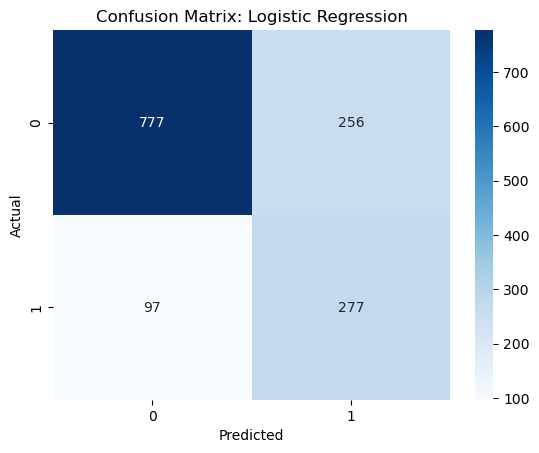

📌 Results for: Random Forest
Accuracy: 0.7874911158493249
Precision: 0.6213592233009708
Recall: 0.5133689839572193
F1 Score: 0.5622254758418741
AUC-ROC: 0.82233358009225

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



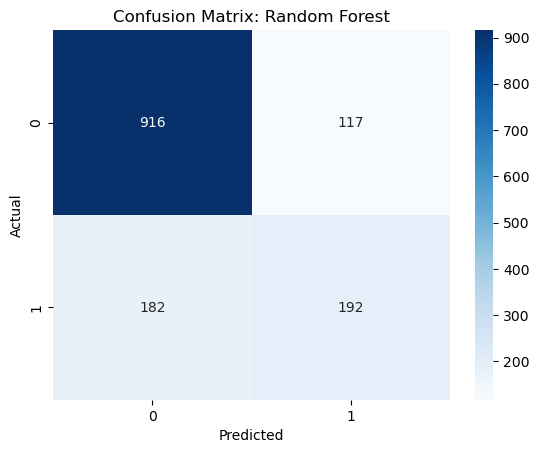

📌 Results for: XGBoost
Accuracy: 0.7690120824449183
Precision: 0.5698005698005698
Recall: 0.5347593582887701
F1 Score: 0.5517241379310345
AUC-ROC: 0.8158691004343303

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1033
           1       0.57      0.53      0.55       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.70      1407
weighted avg       0.76      0.77      0.77      1407



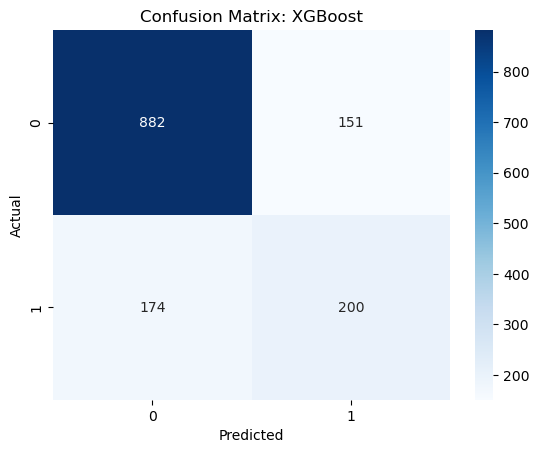

In [59]:
evaluate_model(y_test, y_pred_log, y_prob_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, y_prob_xgb, "XGBoost")

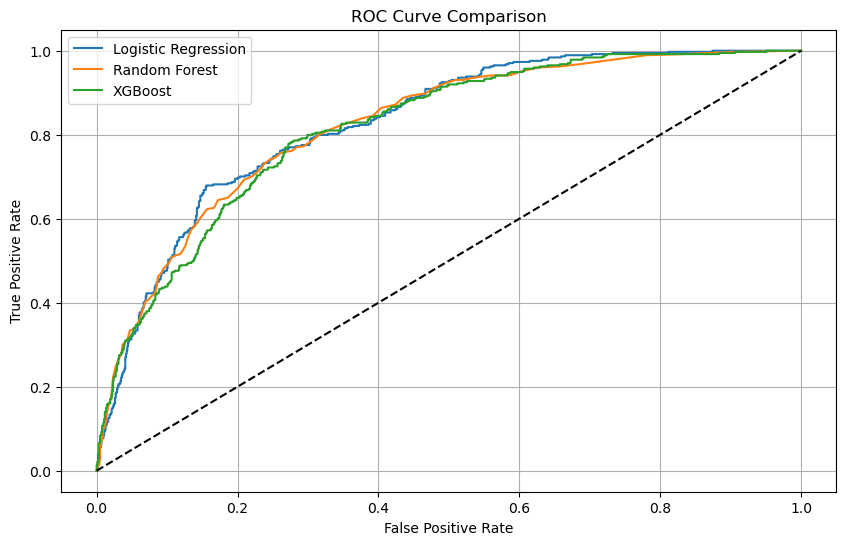

In [61]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

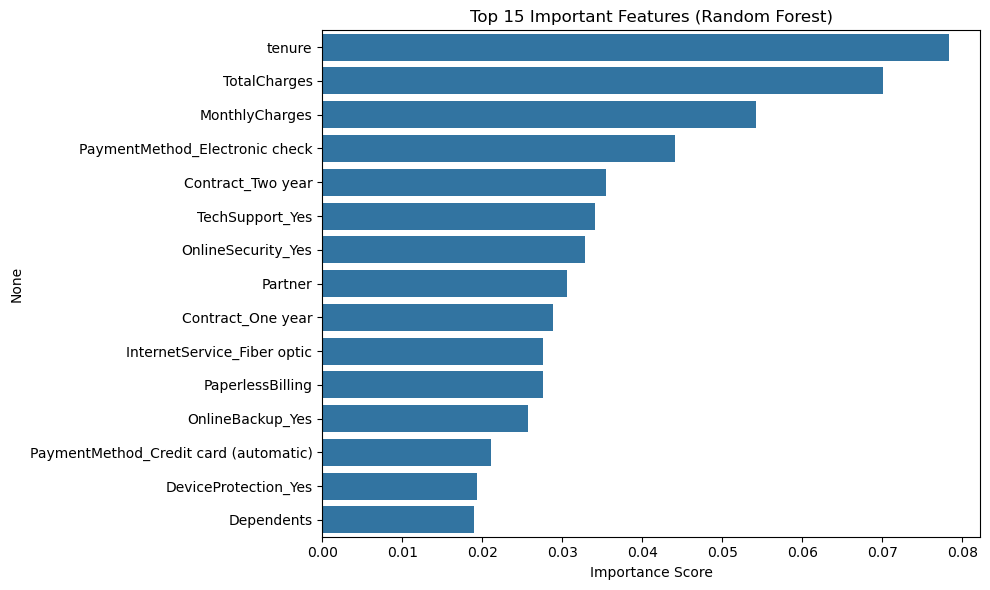

In [65]:
importances_rf = rf.feature_importances_
features_rf = pd.Series(importances_rf, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=features_rf[:15], y=features_rf.index[:15])
plt.title('Top 15 Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

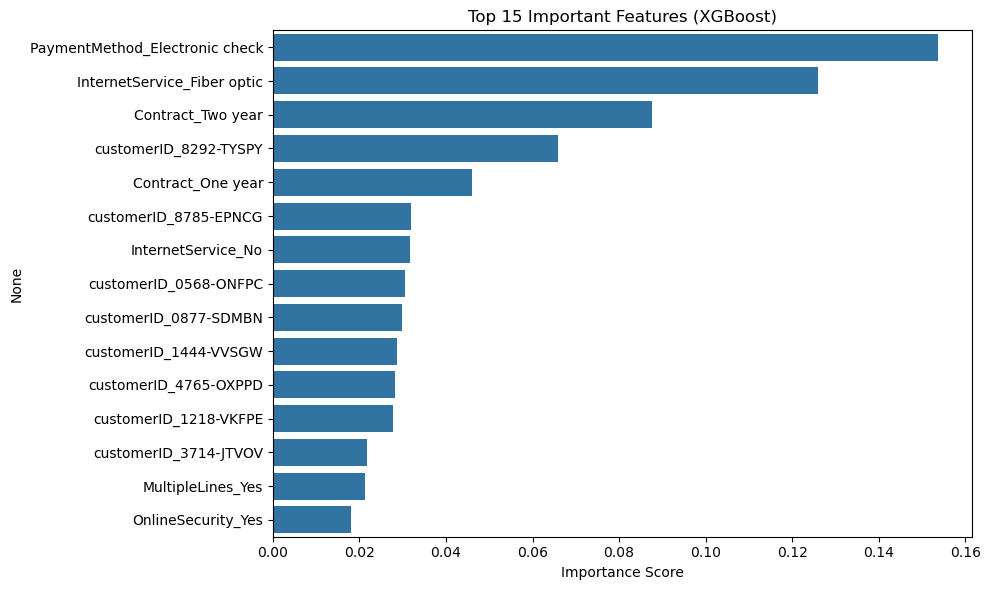

In [67]:
importances_xgb = xgb.feature_importances_
features_xgb = pd.Series(importances_xgb, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=features_xgb[:15], y=features_xgb.index[:15])
plt.title('Top 15 Important Features (XGBoost)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [69]:
# #Feature	Interpretation
# MonthlyCharges	High spenders tend to churn more — maybe price sensitive
# tenure	Lower tenure = newer customers = higher churn
# Contract_Two year	Long-term contracts reduce churn
# TechSupport_Yes	Customers using support churn less (better satisfaction)
# InternetService_Fiber optic	May be linked to higher churn due to pricing or outages

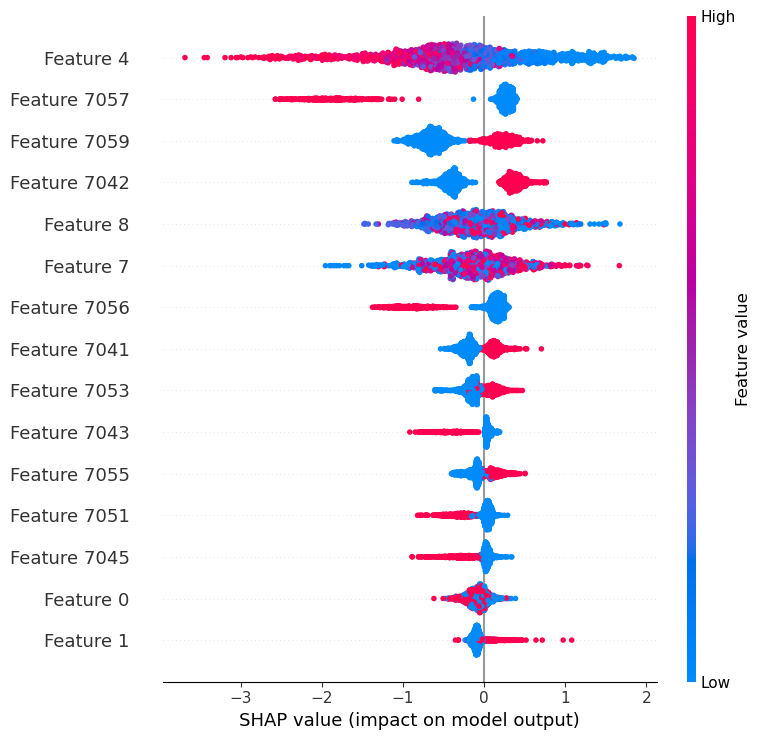

In [71]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, max_display=15)

In [77]:
xgb.predict_proba(X_test)

array([[0.99828225, 0.00171773],
       [0.44132382, 0.5586762 ],
       [0.96411055, 0.03588944],
       ...,
       [0.982776  , 0.01722402],
       [0.9958334 , 0.00416661],
       [0.9880617 , 0.01193827]], dtype=float32)

In [83]:
print(type(churn_probs))
print(churn_probs.shape)

<class 'numpy.ndarray'>
(1407,)


In [91]:
import pandas as pd
import numpy as np

# If X_test was transformed with SimpleImputer, convert it back to DataFrame:
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Predict churn probability (probability of class 1)
churn_probs = xgb.predict_proba(X_test_df)[:, 1]
churn_preds = xgb.predict(X_test_df)

# Convert predictions to Series — no need to assign index if X_test_df is clean
churn_probs_series = pd.Series(churn_probs, name="Churn_Probability")
churn_preds_series = pd.Series(churn_preds, name="Churn_Predicted")

# Reset index to ensure merge compatibility
X_test_df = X_test_df.reset_index(drop=True)
churn_probs_series = churn_probs_series.reset_index(drop=True)
churn_preds_series = churn_preds_series.reset_index(drop=True)

# Combine everything
powerbi_df = pd.concat([X_test_df, churn_probs_series, churn_preds_series], axis=1)

# Save to CSV
powerbi_df.to_csv("churn_predictions.csv", index=False)